In [26]:
try:
    from logger import logger
    from config import problem_type
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV, train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import pandas as pd
    import numpy as np
    import os
    from sklearn.preprocessing import LabelEncoder
    import seaborn as sns
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    import pickle
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline, FeatureUnion
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import cross_val_score


except ImportError as e:
    print(e)

# read data

In [2]:
df = pd.read_csv(r"Datasets\flight_data.csv",index_col=0)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [4]:
value_to_map= {}
for col in df.columns:
    # print(col)
    if (df[col].dtype== object) and (col not in ["flight","price"]):
        i=0
        for index in df[col].unique():
            if not index in value_to_map.keys():
                value_to_map[index] = i
                i+=1
        df[col] = df[col].map(value_to_map).astype(int)

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SG-8709,0,0,0,4,1,0,2.17,1,5953
1,0,SG-8157,0,1,0,2,1,0,2.33,1,5953
2,1,I5-764,0,1,0,1,1,0,2.17,1,5956
3,2,UK-995,0,2,0,3,1,0,2.25,1,5955
4,2,UK-963,0,2,0,2,1,0,2.33,1,5955


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 27.5+ MB


In [8]:
label_encoder = LabelEncoder()
df['flight'] = label_encoder.fit_transform(df['flight'])
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,1408,0,0,0,4,1,0,2.17,1,5953
1,0,1387,0,1,0,2,1,0,2.33,1,5953
2,1,1213,0,1,0,1,1,0,2.17,1,5956
3,2,1559,0,2,0,3,1,0,2.25,1,5955
4,2,1549,0,2,0,2,1,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,2,1477,5,2,1,0,4,1,10.08,49,69265
300149,2,1481,5,3,1,4,4,1,10.42,49,77105
300150,2,1486,5,1,1,4,4,1,13.83,49,79099
300151,2,1483,5,1,1,0,4,1,10.00,49,81585


In [15]:
df['flight_decoded'] = label_encoder.inverse_transform(df['flight'])
encoding_decoding_pair = df[['flight',"flight_decoded"]].to_json()
json_data = df[['flight',"flight_decoded"]].to_json(orient='records')

# Save the JSON data to a file
with open('encoding_decoding_pair.json', 'w') as file:
    file.write(json_data)
df.drop(['flight_decoded'],axis=1, inplace= True)

In [16]:
standardscaler = StandardScaler()
df["standardized_data"] = standardscaler.fit_transform(df[['flight']])

minmaxscaler = MinMaxScaler()
df["normalized_data"] = minmaxscaler.fit_transform(df[['flight']])

In [17]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,standardized_data,normalized_data
0,0,1408,0,0,0,4,1,0,2.17,1,5953,0.749163,0.902564
1,0,1387,0,1,0,2,1,0,2.33,1,5953,0.699947,0.889103
2,1,1213,0,1,0,1,1,0,2.17,1,5956,0.292161,0.777564
3,2,1559,0,2,0,3,1,0,2.25,1,5955,1.103046,0.999359
4,2,1549,0,2,0,2,1,0,2.33,1,5955,1.079610,0.992949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,2,1477,5,2,1,0,4,1,10.08,49,69265,0.910871,0.946795
300149,2,1481,5,3,1,4,4,1,10.42,49,77105,0.920246,0.949359
300150,2,1486,5,1,1,4,4,1,13.83,49,79099,0.931964,0.952564
300151,2,1483,5,1,1,0,4,1,10.00,49,81585,0.924933,0.950641


<Axes: >

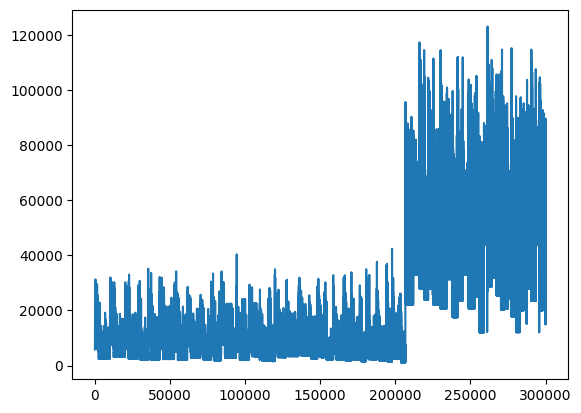

In [18]:
df['price'].plot()

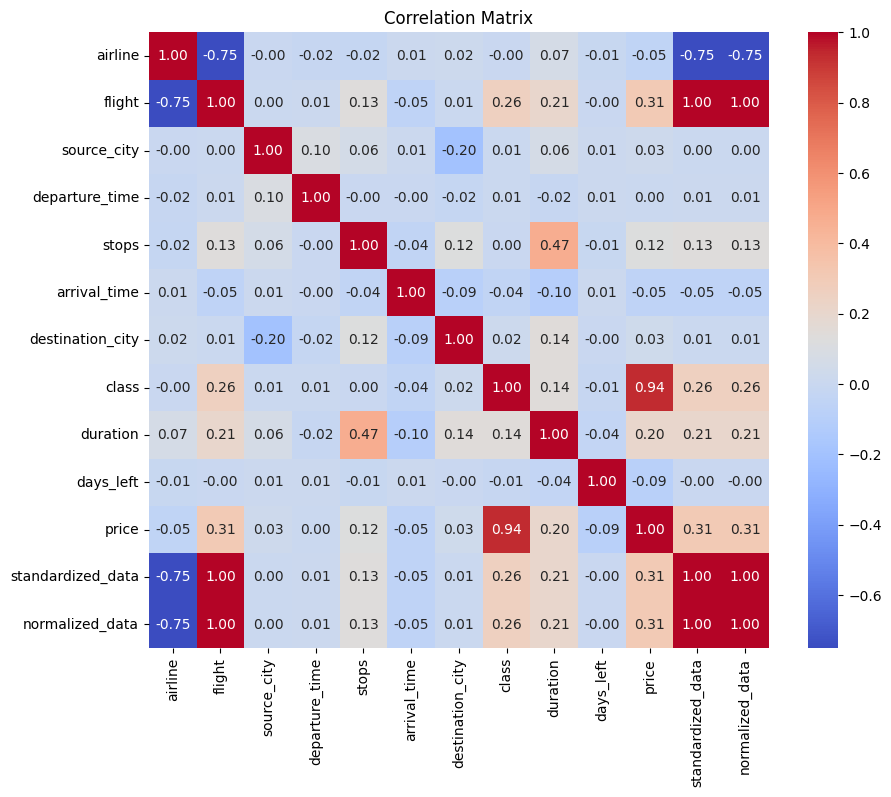

In [19]:
corr_matrix = df.corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

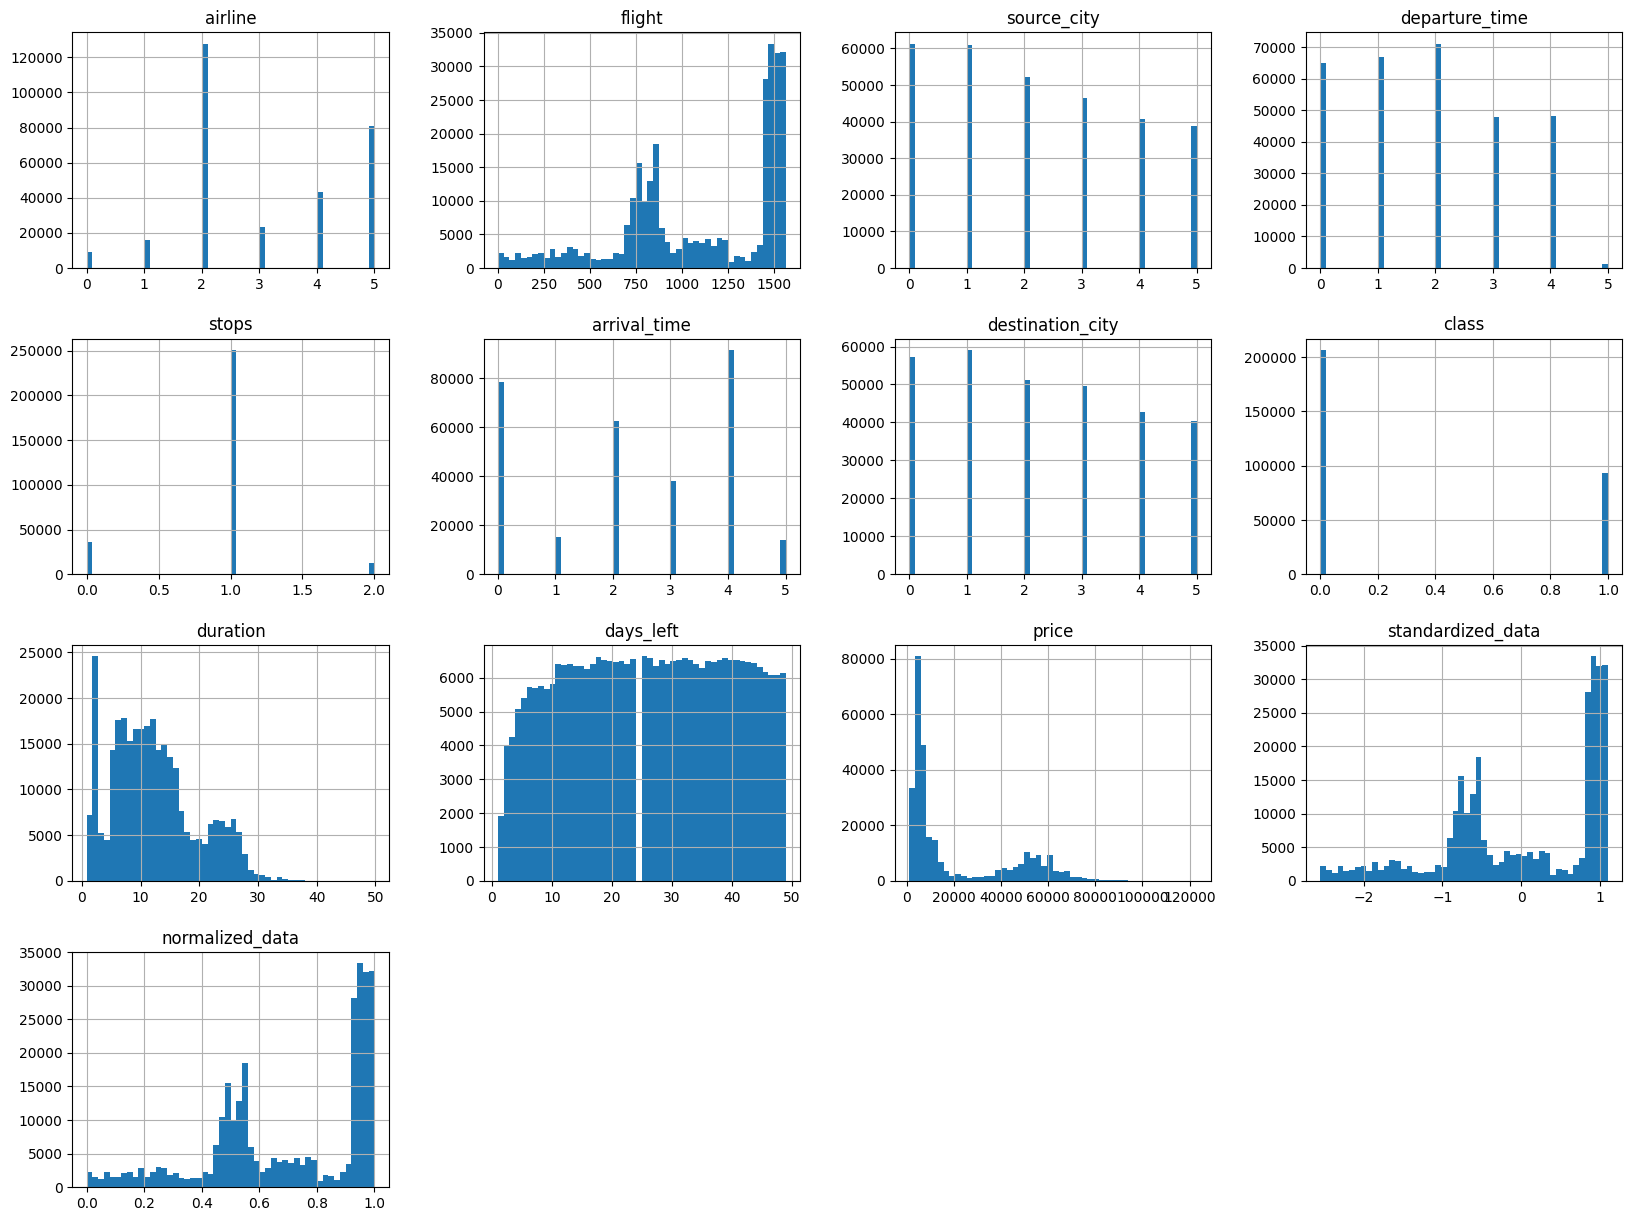

In [20]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [21]:
df.reset_index(drop=True, inplace= True)
X = df.drop(['price'],axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(297151, 12)
(3002, 12)
(297151,)
(3002,)


# linear regression

In [27]:
from sklearn.linear_model import LinearRegression
param_grid_lr = {'fit_intercept': [True, False]}

# Initialize the models
lr = LinearRegression()
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='r2')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("best_lr",best_lr)
y_pred_lr = best_lr.predict(X_test)
# Calculate metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression: MAE={mae_lr}, MSE={mse_lr}, R2={r2_lr}")

best_lr LinearRegression()
Linear Regression: MAE=4599.488142850783, MSE=51389060.68962427, R2=0.9009058564593397


In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
price_pred = lin_reg.predict(X_test)

In [30]:


mae = mean_absolute_error(y_test, price_pred)
mse = mean_squared_error(y_test, price_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, price_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# housing_predictions = lin_reg.predict(housing_prepared)
# lin_mse = mean_squared_error(price_pred, y_test)
# lin_mse

Mean Absolute Error (MAE): 4599.49
Mean Squared Error (MSE): 51389060.69
Root Mean Squared Error (RMSE): 7168.62
R-squared (R²): 0.90


In [20]:
print(y_test.mean())
print(price_pred.mean())

20768.040306462357
20775.812000357157


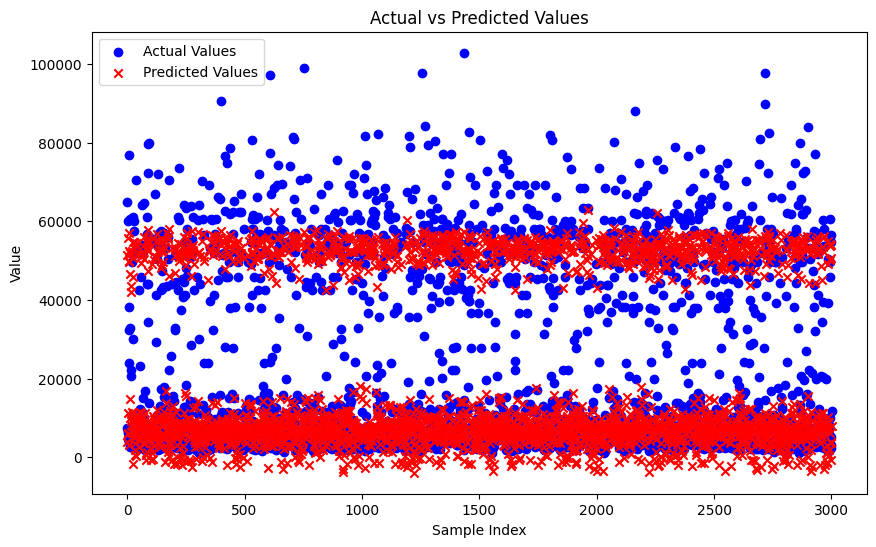

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='b', marker='o')
# Scatter plot for predicted values
plt.scatter(range(len(price_pred)), price_pred, label='Predicted Values', color='r', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# decisiontreeregressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor()

In [34]:
param_grid_dtr = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dtr = DecisionTreeRegressor(random_state=42)
grid_search_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid_dtr, cv=5, scoring='r2')
# print("grid_search_dtr",grid_search_dtr)
grid_search_dtr.fit(X_train, y_train)
best_dtr = grid_search_dtr.best_estimator_
print("best_dtr",best_dtr)
y_pred_dtr = best_dtr.predict(X_test)

mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
print(f"Decision Tree Regressor: MAE={mae_dtr}, MSE={mse_dtr}, R2={r2_dtr}")


best_dtr DecisionTreeRegressor(max_depth=30, min_samples_split=20, random_state=42)
Decision Tree Regressor: MAE=862.3630958573613, MSE=5309848.314165462, R2=0.9897609556593961


In [23]:
tree_pred = tree_reg.predict(X_test)

mae = mean_absolute_error(y_test, tree_pred)
mse = mean_squared_error(y_test, tree_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, tree_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# housing_predictions = lin_reg.predict(housing_prepared)
# lin_mse = mean_squared_error(price_pred, y_test)
# lin_mse
tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

Mean Absolute Error (MAE): 737.74
Mean Squared Error (MSE): 6539769.51
Root Mean Squared Error (RMSE): 2557.30
R-squared (R²): 0.99


np.float64(2557.2973056517444)

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Actual Values', marker='o')
# plt.plot(tree_pred, label='Predicted Values', marker='x')
# Plotting actual values
# plt.plot(y_test, label='Actual Values', marker='o', linestyle='-', color='b')

# # Plotting predicted values
# plt.plot(tree_pred, label='Predicted Values', marker='x', linestyle='-', color='r')
plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='b', marker='o')

# Scatter plot for predicted values
plt.scatter(range(len(tree_pred)), tree_pred, label='Predicted Values', color='r', marker='x')


plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg,X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)


In [ ]:
forest_pred = forest_reg.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


In [ ]:
lin_scores = cross_val_score(forest_reg,X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_


In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [38]:
from datetime import datetime

f'conversation_{datetime.now().strftime("%Y_%m_%d")}.json'

'conversation_2024_07_30.json'